In [31]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 30)
#pd.set_option('display.width', 800)

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
from pylab import rcParams
%config InlineBackend.figure_format = 'svg'
%matplotlib inline

Используем датасет с данными IMDB до 2014 год, доступный на сайте kaggle.
https://storage.googleapis.com/kaggle-datasets/378/785/imdb.csv.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1559212509&Signature=mKZdr3xNaNagNHQ6%2FszsPMZ4AZwIHCT3cjvxZ4Oazl%2F5hGSgKFuR012Uwee%2Fmn%2F3TsYp2dsuOncCgN8KaqLZLx1FeMv2rfU1TrzN6pbanWi7JCJwM8dZM1AkbS1US7yvlFeZ0%2FOL33cTIvaVqfr7nXLph2GoCxt%2FzqAajdaZhNV8FbWMYemHm5t7%2FA10uKS9mQ%2Byg1PW9ZkRhDG6m4USucsMB6xaS%2FGBABqAeiMd%2FvjaF4yFydD9IK7xMJvJYa3BUBb4kIPv75Tt9US4b72VGYWhqzAFOuVsJjG6bSrbKIg4wFTDdmoiAaQiNdF8rSpBYVjTFsVGbGt1M%2FuZyAFkUA%3D%3D

In [32]:
data = pd.read_csv('input/imdb.csv')

Добавим в Датафрейм только интересующие нас столбцы с данными:

    nrOfWins - Количество побед 
    nrOfNominations Количество номинаций
    type - тип (фильм, сериал, игра)
    History - флаг категории "Исторический"}

In [33]:
df = pd.DataFrame({'x': data.nrOfWins, 'y': data.nrOfNominations, 'z':data.type, 'w':data.History}, columns=['x', 'y', 'z', 'w'])

Нас интересуют только исторические фильмы, поэтому отфильтруем эти значения:

In [79]:
df = df[(df['z'] == 'video.movie') &  (df['w'] == 1) ]

In [80]:
df.head()

,x,y,z,w,y_pred
14634,0.0,0.0,video.movie,1.0,0.814725
12154,0.0,0.0,video.movie,1.0,0.814725
13013,0.0,0.0,video.movie,1.0,0.814725
11759,0.0,0.0,video.movie,1.0,0.814725
11785,0.0,0.0,video.movie,1.0,0.814725


In [81]:
df.describe()

,x,y,w,y_pred
count,471.000000,471.000000,471.0,471.000000
mean,6.084926,6.874735,1.0,6.874735
std,11.769651,13.755433,0.0,11.721458
min,0.000000,0.000000,1.0,0.814725
25%,0.000000,0.000000,1.0,0.814725
50%,2.000000,2.000000,1.0,2.806535
75%,7.500000,8.000000,1.0,8.284015
max,131.000000,137.000000,1.0,131.278318


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 471 entries, 14634 to 248
Data columns (total 5 columns):
x         471 non-null float64
y         471 non-null float64
z         471 non-null object
w         471 non-null float64
y_pred    471 non-null float64
dtypes: float64(4), object(1)
memory usage: 22.1+ KB


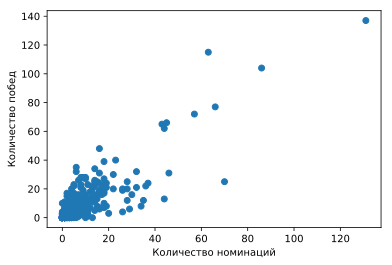

In [84]:
df = df.sort_values('x')
plt.scatter(df['x'], df['y'])
plt.xlabel('Количество номинаций')
plt.ylabel('Количество побед')
plt.show()

H0: вариации количества побед ($y$) фильмов в категории 'Исторический' объясняются вариацией фактора $x$ — количество номинаций

In [40]:
# количество наблюдений

In [41]:
n = df['x'].count()
n

471

Для нахождения коэффициентов регрессии  a  и  b  воспользуемся приведенными выше формулами:

In [42]:
b = (np.mean(df['x'] * df['y']) - np.mean(df['x']) * np.mean(df['y'])) / (np.mean(df['x']**2) - np.mean(df['x']) ** 2)

In [43]:
b

0.9959052946319297

In [44]:
a = np.mean(df['y']) - b * np.mean(df['x'])
a

0.8147248950846908

Итак, уравнение регрессии имеет вид (коэффициенты округлены до тысячных):

y = 0.815 + 0.996$x$

С помощью этого уравнения регрессии посчитаем значения, предсказанные моделью значения количества побед, и поместим в датафрейм df:

In [75]:
df['y_pred'] = a + b * df['x'] 

Отсортируем значения по полю x:

In [76]:
df = df.sort_values('x')

Построим на одном графике исходные данные и теоретическую прямую, построенную по уравнению регрессии:

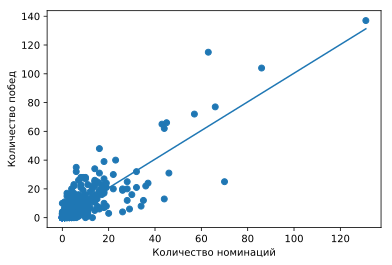

In [77]:
plt.scatter(df['x'], df['y'])
plt.plot(df['x'], df['y_pred'])
plt.xlabel('Количество номинаций')
plt.ylabel('Количество побед')
plt.show()

Найдем коэффициент корреляции $r$ с помощью коэффициента $b$ и средних квадратического отклонения, посчитанного для массивов $x$ и $y$:

In [29]:
r = b * np.std(df['x']) / np.std(df['y'])
r

0.8521329661401327

Найдем коэффициент детерминации $R^2$:

In [30]:
R2 = r**2
R2

0.7261305919827805

Это означает, что 72.61% вариации количества побед ($y$) объясняется вариацией фактора $x$ — количество номинаций.

Качество модели найдем с помощью средней ошибки аппроксимации $\overline {A}$:

In [85]:
x = np.array([df['x']])
y = np.array([df['y']])
y_pred = a + b * x

In [48]:
A_mean = 100 * np.mean(np.abs((y - y_pred) / y))
A_mean

inf

Нам не удалось определить среднюю ошибку аппроксимации  A⎯⎯⎯⎯A¯, поскольку среди y есть нулевые значения:

Фактическую величину F-критерия для парной линейной регрессии (когда есть только один факторный признак)
можно вычислить по формуле, включающей коэффициент детерминации:

Fфакт=r2⋅(n−2)(1−r2)
где k1 и k2 — это степени свободы, k1 — количество факторных признаков (для парной линейной регрессии оно равно 1).
k2 = n−k−1, где n — это число наблюдений и k — число факторных признаков (для парной линейной регрессии k2=n−2,
то есть числу наблюдений, уменьшенному на 2).

Таблицу значений F-критерия Фишера (FкрFкр) можно посмотреть по ссылке: Таблица критерия Фишера
Если Fфакт>Fкр, то уравнение регрессии признается статистически значимым.

Формула для большего числа признаков:

Для оценки значимости уравнения регрессии воспользуемся F-критерием Фишера. Найдем фактическое значение $F$-критерия ($F_{факт}$):

In [50]:
F_fact = (r**2 * (n - 2)) / (1 - r**2)
F_fact

1243.495029640228

При 0,1 % уровне значимости и степенях свободы 𝑘1=1 и 𝑘2=549−2=547 табличное значение критерия: 𝐹кр=10.83 .
Так как 𝐹факт=1243 > 𝐹кр=5.32 , уравнение регрессии статистически значимо.

Найдем ковариацию этих двух величин:

In [57]:
cov = np.cov(x,y, ddof=1)
print(cov)
print(f'ковариация: {cov[0,1]}')

[[138.52468718 137.9574694 ]
 [137.9574694  189.21193477]]
ковариация: 137.9574693951303


Найдем коэффициент корреляции Пирсона 

In [58]:
r_cov = np.corrcoef(x,y)
print(r_cov)
print(f'коэффициент корреляции Пирсона (r): {r_cov[0,1]}')

[[1.         0.85213297]
 [0.85213297 1.        ]]
коэффициент корреляции Пирсона (r): 0.8521329661401319


In [59]:
df.corr()

,x,y,w
x,1.000000,0.852133,NaN
y,0.852133,1.000000,NaN
w,NaN,NaN,NaN


Исходная гипотеза верна

H0: вариации количества побед ($y$) фильмов в категории 'Исторический' объясняются вариацией фактора $x$ — количество номинаций

Можно даже утверждать, что каждый фильм в этой категории получит на 1 награду больше, чем будет у него номинаций.